In [7]:
#!pip install scikeras

In [8]:
#import pandas as pd
#import numpy as np
#import tensorflow as tf
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn import metrics
#from imblearn.over_sampling import ADASYN
#from google.colab import drive
#drive.mount('/content/drive/')
#import sys
#sys.path.append('/content/drive/MyDrive')
#from scikeras.wrappers import KerasClassifier
#
#from binary_load import binary_load_dataset
#
#from tensorflow.keras.models import Sequential
#from tensorflow import keras
#from tensorflow.keras import layers as Layer
#from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

In [1]:
import sys
sys.path.append('../')  # 상위 폴더(main_folder)의 경로를 추가

from binary_load import binary_load_dataset

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from imblearn.over_sampling import ADASYN
from scikeras.wrappers import KerasClassifier

from binary_load import binary_load_dataset

from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers as Layer
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

from tensorflow.keras.regularizers import L1L2
from timeit import default_timer as timer

In [8]:
csv_loca = "../../../../data/Star.csv"
TEST_SIZE = 0.2
VAL_SIZE = 0.2
RANDOM_STATE = 42

In [5]:

class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        print("Starting training")
        self.starttime = timer()

    def on_train_end(self, logs=None):
        print("End of training, took {} seconds".format(timer()-self.starttime))

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
          print("Epoch is {} and {} seconds passed".format(epoch, timer()-self.starttime))

In [6]:

def modelling(nodes1 = 8, nodes2= 6, nodes3 = 4, drop_rate= 0.2, activation= 'relu'):
  # 모델 만들기
  # 뉴런의 개수는 input과 output 사이의 숫자를 넣으라고 한다. --> 사용, 왜냐하면 시간이 적게 걸려서
  # 뉴런의 개수는 input의 2/3 정도 넣라고 한다.
  # 뉴런의 개수는 input의 두배보다는 적게 넣라고 한다.
  regularizer = L1L2(l1=0.001, l2=0.001)

  model = Sequential([Layer.Dense(12, input_shape=(8,))])
  model.add(Layer.Dense(nodes1, activation = activation, kernel_regularizer=regularizer))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(nodes2, activation = activation, kernel_regularizer=regularizer))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(nodes3, activation = activation, kernel_regularizer=regularizer))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(1, activation = 'sigmoid'))

  # metrics에는 1이 나오는 recall 이랑 acc만 중요하다.
  metrics = [
      Recall(name = 'recall'),
      Precision(name = 'precision'),
      BinaryAccuracy(name = 'binary accuracy') # Accuracy를 사용 안 하는 이유는 Accuracy가 이상하세 나왔기 때문.
  ]

  model.compile(optimizer = 'adam',
                loss='binary_crossentropy',
                metrics = metrics)

  return model

In [9]:
X_train, X_val, X_test, y_train, y_val, y_test, X_train_ad, X_val_ad, X_test_ad, y_train_ad, y_val_ad, y_test_ad  = binary_load_dataset(csv_loca, TEST_SIZE, VAL_SIZE, RANDOM_STATE)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11454, 8), (11454,), (2864, 8), (2864,), (3580, 8), (3580,))

In [10]:
X_train_ad.shape, y_train_ad.shape, X_val_ad.shape, y_val_ad.shape, X_test_ad.shape, y_test_ad.shape

((20711, 8), (20711,), (5178, 8), (5178,), (6473, 8), (6473,))

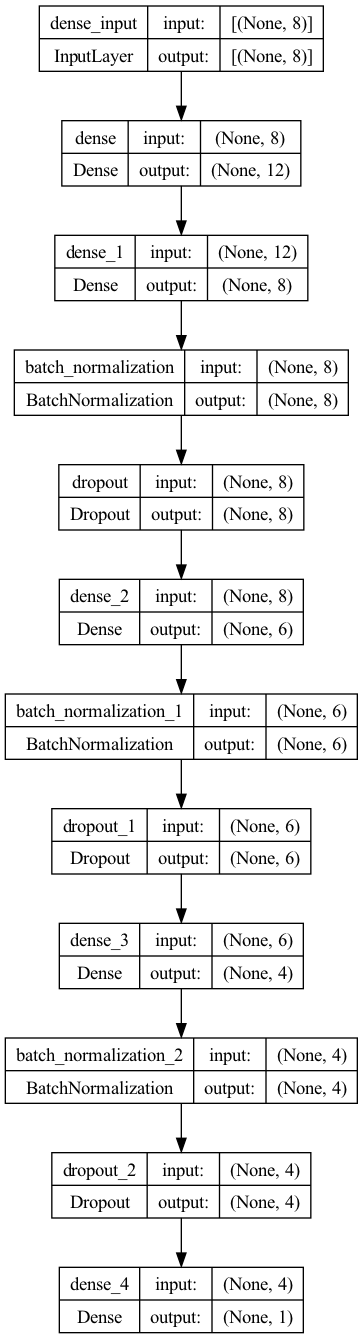

In [11]:
model = modelling()
keras.utils.plot_model(model, show_shapes=True)

In [12]:

check_path = 'model.h5'

callback = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200),
    tf.keras.callbacks.ModelCheckpoint(filepath=check_path, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=200, min_lr=0.001),
    TimingCallback()
]

In [13]:
model.fit(X_train, y_train, batch_size= 1024, epochs= 1000,  validation_data=(X_val, y_val), callbacks=callback,verbose = 0)

Starting training
Epoch is 0 and 0.686571084195748 seconds passed
Epoch is 10 and 0.9782997921574861 seconds passed
Epoch is 20 and 1.281247999984771 seconds passed
Epoch is 30 and 1.5875518340617418 seconds passed
Epoch is 40 and 1.883050792152062 seconds passed
Epoch is 50 and 2.1808869591914117 seconds passed
Epoch is 60 and 2.455679250182584 seconds passed
Epoch is 70 and 2.744623084086925 seconds passed
Epoch is 80 and 3.0172678341623396 seconds passed
Epoch is 90 and 3.277950042160228 seconds passed
Epoch is 100 and 3.536402750061825 seconds passed
Epoch is 110 and 3.80193162499927 seconds passed
Epoch is 120 and 4.062027791980654 seconds passed
Epoch is 130 and 4.329380834009498 seconds passed
Epoch is 140 and 4.6354369590990245 seconds passed
Epoch is 150 and 4.892058833967894 seconds passed
Epoch is 160 and 5.1578011671081185 seconds passed
Epoch is 170 and 5.408046124968678 seconds passed
Epoch is 180 and 5.677091542165726 seconds passed
Epoch is 190 and 5.930286917136982 sec

In [14]:

model.load_weights(check_path)
results = model.evaluate(X_test, y_test)

112/112 [==============================] - 0s 519us/step - loss: 0.0693 - recall: 0.8750 - precision: 0.9082 - binary accuracy: 0.9804


In [15]:

y_test_pred = model.predict(X_test)

y_test_pred = (y_test_pred > 0.35).astype(np.float32)

112/112 [==============================] - 0s 400us/step


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

cm = pd.DataFrame(cm)
cm.columns = ['Predicted 0', 'Predicted 1']
cm.rename(index={0: "True 0", 1: "True 1"}, inplace = True)
cm
     

,Predicted 0,Predicted 1
True 0,3215,37
True 1,36,292


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.89      0.89      0.89       328

    accuracy                           0.98      3580
   macro avg       0.94      0.94      0.94      3580
weighted avg       0.98      0.98      0.98      3580

